In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
%matplotlib inline

In [ ]:
df_train = pd.read_csv('Data Train.csv')
df_test = pd.read_csv('Data Test.csv')

In [ ]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
dfs = [df_train, df_test]

def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
state column missing values: 0
account_length column missing values: 0
area_code column missing values: 0
international_plan column missing values: 0
voice_mail_plan column missing values: 0
number_vmail_messages column missing values: 0
total_day_minutes column missing values: 0
total_day_calls column missing values: 0
total_day_charge column missing values: 0
total_eve_minutes column missing values: 0
total_eve_calls column missing values: 0
total_eve_charge column missing values: 0
total_night_minutes column missing values: 0
total_night_calls column missing values: 0
total_night_charge column missing values: 0
total_intl_minutes column missing values: 0
total_intl_calls column missing values: 0
total_intl_charge column missing values: 0
number_customer_service_calls column missing values: 0
churn column missing values: 0


Test Set
id column missing values: 0
state column missing values: 0
account_length column missing values: 0
area_code column missing values: 0
inter

Setelah dilakukan pengecakan missing value pada data train dan data test, dapat diketahui dari hasil pengecekan tidak terdapat missing value pada data train maupun data test 

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
# describe numerical
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# describe categorical
df_train.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [ ]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


Text(0.5, 1.0, 'Churn (%)')

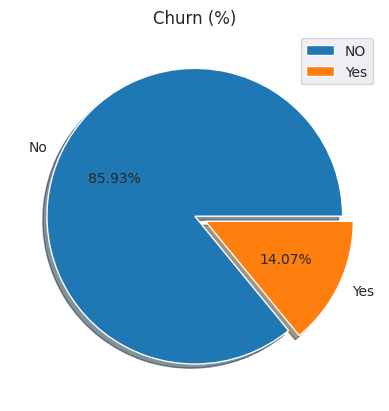

In [ ]:
# Menghitung jumlah churn yes dan no dalam bentuk proporsi
x = df_train['churn'].value_counts(normalize=True)

# Membuat pie chart untuk menampilkan proporsi penumpang yang selamat dan tidak selamat
plt.pie(x,autopct = "%1.2f%%",labels =['No','Yes'],shadow = True, explode = [0, 0.08])

# Menambahkan legenda pada pie chart
plt.legend(['NO','Yes'])

# Menambahkan judul pada pie chart
plt.title('Churn (%)')

Text(0.5, 1.0, 'international plan vs churn')

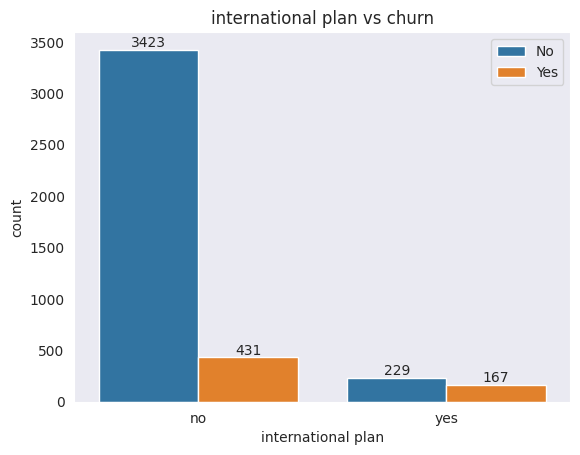

In [ ]:
# Menetapkan gaya plot menjadi 'dark' dengan menggunakan method 'set_style'
sns.set_style(style='dark')


fig,ax = plt.subplots()
x = sns.countplot(x = 'international_plan',data=df_train ,hue ='churn' )

for i in x.containers:
    ax.bar_label(i)
# Menambahkan legenda pada plot
plt.legend(['No','Yes'])

# Menambahkan label pada sumbu x dan judul pada plot
plt.xlabel('international plan')
plt.title('international plan vs churn')


Text(0.5, 1.0, 'voice mail plan vs churn')

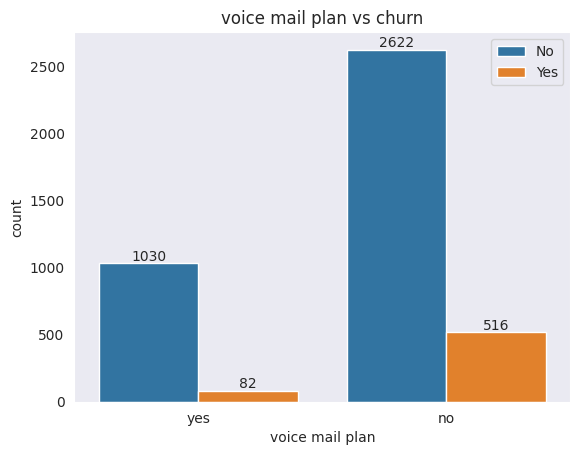

In [ ]:
# Menetapkan gaya plot menjadi 'dark' dengan menggunakan method 'set_style'
sns.set_style(style='dark')

fig,ax = plt.subplots()
x = sns.countplot(x = 'voice_mail_plan',data=df_train ,hue ='churn' )

for i in x.containers:
    ax.bar_label(i)
# Menambahkan legenda pada plot
plt.legend(['No','Yes'])

# Menambahkan label pada sumbu x dan judul pada plot
plt.xlabel('voice mail plan')
plt.title('voice mail plan vs churn')

In [ ]:
cat_var = [ feature for feature in df_train.columns if df_train[feature].dtypes=='O']

In [ ]:
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

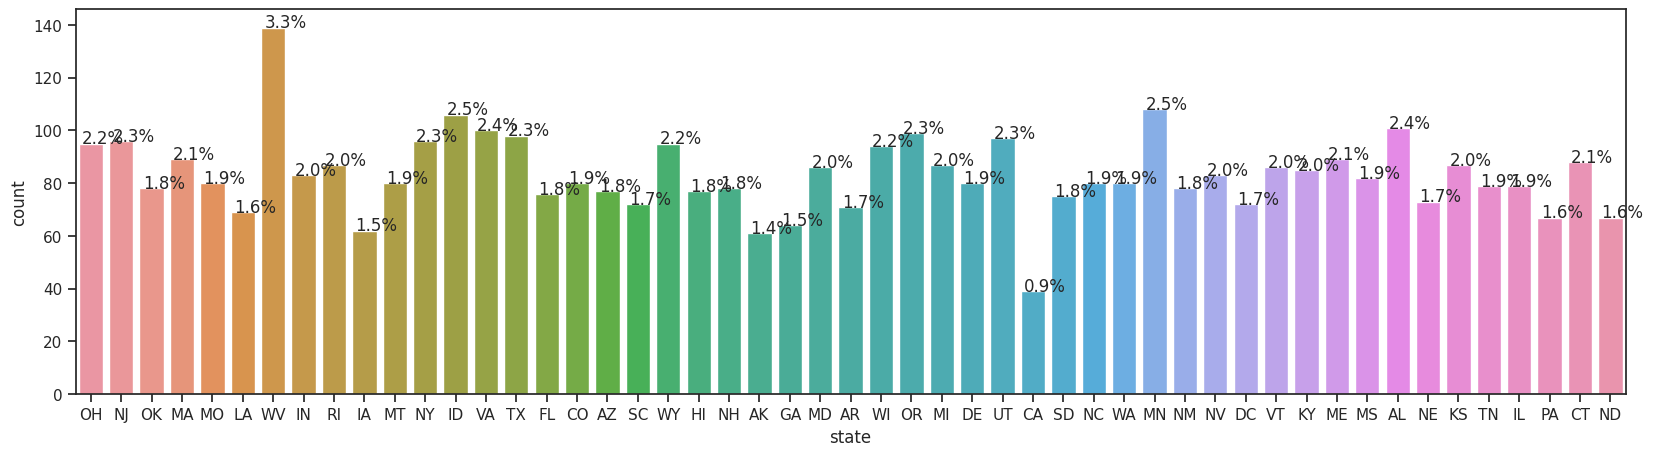

In [ ]:
sns.set(style = 'ticks')
total = len(df_train)
plt.figure(figsize=(20,5))
ax = sns.countplot(x = df_train['state'], data = df_train)
#plt.title(feature)
with_per(total, ax)
plt.show()

In [ ]:
num_var = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']

In [ ]:
num_var

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

<ipython-input-20-c7a5dd0e2758>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['total_day_charge'])


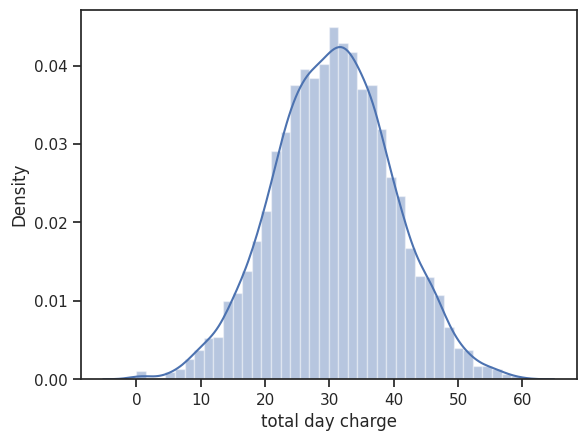

In [ ]:
    sns.distplot(df_train['total_day_charge'])
    plt.xlabel('total day charge')
    plt.ylabel('Density')
    plt.show()

<ipython-input-21-843c8a5950bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['total_eve_charge'])


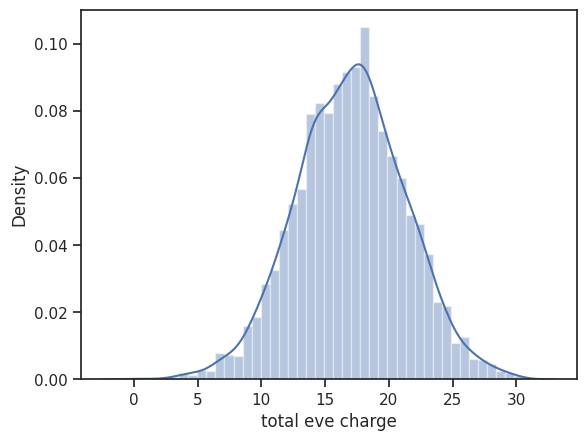

In [ ]:
sns.distplot(df_train['total_eve_charge'])
plt.xlabel('total eve charge')
plt.ylabel('Density')
plt.show()

<ipython-input-22-2a6b6f2ad415>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['total_night_charge'])


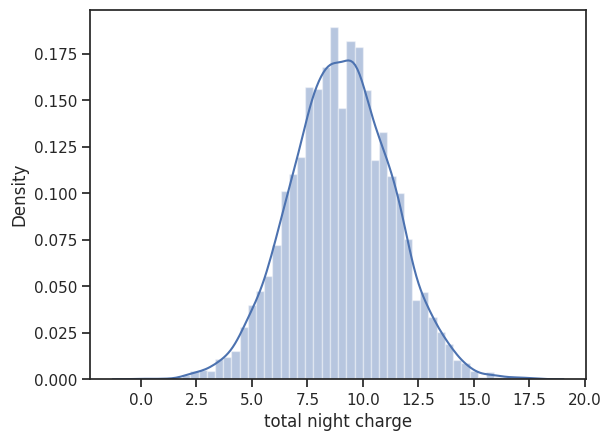

In [ ]:
sns.distplot(df_train['total_night_charge'])
plt.xlabel('total night charge')
plt.ylabel('Density')
plt.show()

In [ ]:
# Resolve Inconsistences, hapus string area_code pada kolom area_code
df_train['area_code'] = df_train['area_code'].str[10:]
df_test['area_code'] = df_test['area_code'].str[10:]

In [ ]:
# Featured Encoding, ubah no dan yes ke binary
df_train['churn'].replace(['no', 'yes'], [0, 1],inplace = True)
df_train['international_plan'].replace(['no', 'yes'], [0, 1],inplace = True)
df_train['voice_mail_plan'].replace(['no', 'yes'], [0, 1],inplace = True)

df_test['international_plan'].replace(['no', 'yes'], [0, 1],inplace = True)
df_test['voice_mail_plan'].replace(['no', 'yes'], [0, 1],inplace = True)

In [ ]:
def remove_outliers(df_train,labels):
    for label in labels:
        q1 = df_train[label].quantile(0.25)
        q3 = df_train[label].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df_train[label] = df_train[label].mask(df_train[label]< lower_bound, df_train[label].median(),axis=0)
        df_train[label] = df_train[label].mask(df_train[label]> upper_bound, df_train[label].median(),axis=0)

    return df_train

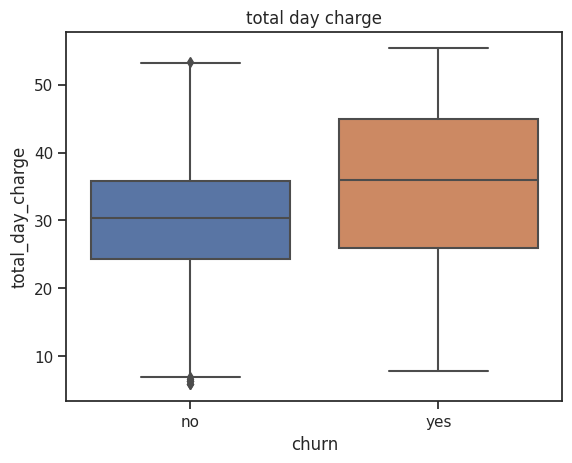

In [ ]:
sns.boxplot(x ='churn', y = 'total_day_charge', data = df_train)
plt.title('total day charge')
plt.show()

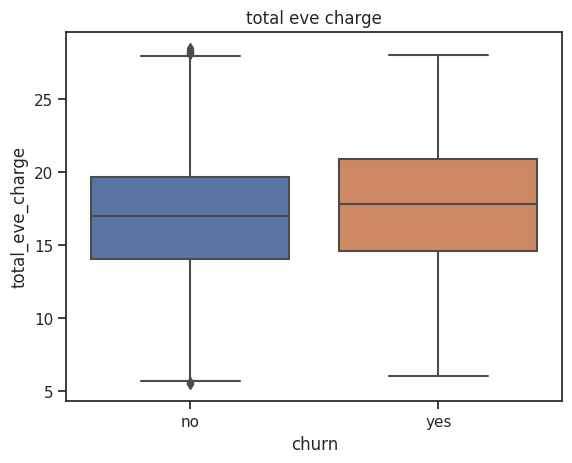

In [ ]:
sns.boxplot(x ='churn', y = 'total_eve_charge', data = df_train)
plt.title('total eve charge')
plt.show()

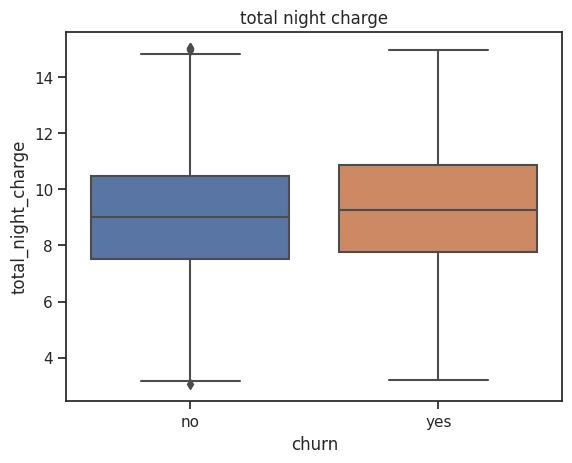

In [ ]:
sns.boxplot(x ='churn', y = 'total_night_charge', data = df_train)
plt.title('total night charge')
plt.show()

In [ ]:
df_train = remove_outliers(df_train, num_var)

In [ ]:
hash_state = ce.HashingEncoder(cols = 'state')
df_train = hash_state.fit_transform(df_train)
df_test = hash_state.transform(df_test)
df_train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107.0,415,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0
1,0,1,0,0,0,0,0,0,137.0,415,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0
2,0,0,0,0,1,0,0,0,84.0,408,...,88.0,17.06,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0
3,0,0,0,0,1,0,0,0,75.0,415,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0
4,0,0,0,0,1,0,0,0,121.0,510,...,108.0,17.06,212.6,118.0,9.57,7.5,7.0,2.03,3.0,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_area = OneHotEncoder()
onehot_area.fit(df_train[['area_code']])

# Train
encoded_values = onehot_area.transform(df_train[['area_code']])
df_train[onehot_area.categories_[0]] = encoded_values.toarray()
train = df_train.drop('area_code', axis=1)

# Test
encoded_values = onehot_area.transform(df_test[['area_code']])
df_test[onehot_area.categories_[0]] = encoded_values.toarray()
test = df_test.drop('area_code', axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

from xgboost import XGBClassifier
x = df_train.drop('churn',axis=1).values
y = df_train.churn.values
id_submission = df_test.id
df_test = df_test.drop('id', axis=1)
# spliting the data into test and train
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

In [ ]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)   
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 2550
Before upsampling count of label 1 425
After upsampling count of label 0 2550
After upsampling count of label 1 2550


In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
df_test = scaler.transform(df_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
x_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [ ]:
print(x_test)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
from sklearn.linear_model import LogisticRegression
rfc = LogisticRegression()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Logistic Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.8698039215686274
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1102
           1       0.59      0.13      0.22       173

    accuracy                           0.87      1275
   macro avg       0.73      0.56      0.57      1275
weighted avg       0.84      0.87      0.83      1275

Confusion Matrix
[[1086   16]
 [ 150   23]]
Cohen kappa score: 
0.17583701315389832


In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test).round()
print('Ridge Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.8705882352941177
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1102
           1       0.64      0.10      0.18       173

    accuracy                           0.87      1275
   macro avg       0.76      0.55      0.55      1275
weighted avg       0.84      0.87      0.83      1275

Confusion Matrix
[[1092   10]
 [ 155   18]]
Cohen kappa score: 
0.14685283490208312


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test).round()
print('KNN Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.8611764705882353
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      1102
           1       0.45      0.12      0.18       173

    accuracy                           0.86      1275
   macro avg       0.67      0.55      0.55      1275
weighted avg       0.82      0.86      0.82      1275

Confusion Matrix
[[1078   24]
 [ 153   20]]
Cohen kappa score: 
0.13683634791987798


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test).round()
print('Naive Bayes Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.8447058823529412
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1102
           1       0.44      0.49      0.46       173

    accuracy                           0.84      1275
   macro avg       0.68      0.69      0.68      1275
weighted avg       0.85      0.84      0.85      1275

Confusion Matrix
[[993 109]
 [ 89  84]]
Cohen kappa score: 
0.36867297535211263


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test).round()
print('Decission Tree Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.8847058823529412
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1102
           1       0.73      0.24      0.36       173

    accuracy                           0.88      1275
   macro avg       0.81      0.61      0.65      1275
weighted avg       0.87      0.88      0.86      1275

Confusion Matrix
[[1087   15]
 [ 132   41]]
Cohen kappa score: 
0.31245162308005536


In [ ]:
y_pred_test = decision_tree.predict(df_test) 

In [ ]:
submission = pd.DataFrame({
        "id": id_submission,
        "churn":y_pred_test
    })

In [ ]:
submission.head()

,id,churn
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
submission.to_csv('data.csv', index=False)